In [1]:
import pandas as pd
import re
import numpy as np
import string
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.sparse import hstack
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# from pycaret.classification import setup, compare_models, predict_model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
# from pycaret.classification import *
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/Data_All_Included_translated.csv", encoding=" ISO-8859-1")

In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.columns

Index(['dataset', 'title', 'keywords', 'description', 'theme', 'combined',
       'Detected Language', 'Translated'],
      dtype='object')

In [6]:
data

,dataset,title,keywords,description,theme,combined,Detected Language,Translated
0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,SOCI,Population in group establishments by Province...,en,Population in group establishments by Province...
1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,TECH,Small punch tensile/fracture test data for P91...,en,Small punch tensile/fracture test data for P91...
2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",GOVE,Flash Eurobarometer 217: Intercultural dialogu...,en,Flash Eurobarometer 217: Intercultural dialogu...
3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,ECON,Actividades de educación no formal realizadas ...,es,Non -formal education activities carried out f...
4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,SOCI,Criminal offences charged against the person c...,en,Criminal offences charged against the person c...
...,...,...,...,...,...,...,...,...
40117,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Graduados universitarios según hayan rechazado...,Survey on the Labour Insertion of University G...,Table of INEBase\nGraduados universitarios seg...,ECON,Graduados universitarios según hayan rechazado...,es,University graduates as they have rejected som...
40118,http://data.europa.eu/88u/dataset/s2091_83_4_4...,Special Eurobarometer 436: Attitudes of Europe...,special eurobarometer,Biodiversity  the unique web of life on Earth...,GOVE,Special Eurobarometer 436: Attitudes of Europe...,en,Special Eurobarometer 436: Attitudes of Europe...
40119,http://data.europa.eu/88u/dataset/2e24efac-795...,CORINE Land Cover changes Iceland 2018 (CHA),"INSPIRE, GSL, Evrópuverkefni, Downloadable dat...",Corine Land Cover (CLC) 2018 and CLC change 20...,ENVI,CORINE Land Cover changes Iceland 2018 (CHA) I...,en,CORINE Land Cover changes Iceland 2018 (CHA) I...
40120,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Control de la empresa (público o privado). EAE...,"Statistics, Labour market and wages, Income an...",Table of INEBase\nControl de la empresa (públi...,ECON,Control de la empresa (público o privado). EAE...,es,Company control (public or private). EAES: Q (...


In [7]:
from collections import Counter
Counter(data['Detected Language'])

Counter({'en': 30028,
         'es': 9076,
         'fr': 216,
         'nl': 39,
         'is': 94,
         'de': 210,
         'ro': 229,
         'gn': 69,
         'hu': 20,
         'sv': 17,
         'pt': 21,
         'ca': 73,
         'om': 5,
         'hr': 11,
         'da': 5,
         'so': 1,
         'gl': 4,
         'sw': 1,
         'la': 1,
         'lv': 1,
         'mt': 1})

In [ ]:
encoded_data = pd.get_dummies(data, columns=['theme'])

In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Detected Language,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,Population in group establishments by Province...,en,Population in group establishments by Province...,0,0,0,0,0,0,0,0,0,0,1,0,0
1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,Small punch tensile/fracture test data for P91...,en,Small punch tensile/fracture test data for P91...,0,0,0,0,0,0,0,0,0,0,0,1,0
2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",Flash Eurobarometer 217: Intercultural dialogu...,en,Flash Eurobarometer 217: Intercultural dialogu...,0,0,0,0,0,1,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,Actividades de educación no formal realizadas ...,es,Non -formal education activities carried out f...,0,1,0,0,0,0,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,Criminal offences charged against the person c...,en,Criminal offences charged against the person c...,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40117,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Graduados universitarios según hayan rechazado...,Survey on the Labour Insertion of University G...,Table of INEBase\nGraduados universitarios seg...,Graduados universitarios según hayan rechazado...,es,University graduates as they have rejected som...,0,1,0,0,0,0,0,0,0,0,0,0,0
40118,http://data.europa.eu/88u/dataset/s2091_83_4_4...,Special Eurobarometer 436: Attitudes of Europe...,special eurobarometer,Biodiversity  the unique web of life on Earth...,Special Eurobarometer 436: Attitudes of Europe...,en,Special Eurobarometer 436: Attitudes of Europe...,0,0,0,0,0,1,0,0,0,0,0,0,0
40119,http://data.europa.eu/88u/dataset/2e24efac-795...,CORINE Land Cover changes Iceland 2018 (CHA),"INSPIRE, GSL, Evrópuverkefni, Downloadable dat...",Corine Land Cover (CLC) 2018 and CLC change 20...,CORINE Land Cover changes Iceland 2018 (CHA) I...,en,CORINE Land Cover changes Iceland 2018 (CHA) I...,0,0,0,0,1,0,0,0,0,0,0,0,0
40120,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Control de la empresa (público o privado). EAE...,"Statistics, Labour market and wages, Income an...",Table of INEBase\nControl de la empresa (públi...,Control de la empresa (público o privado). EAE...,es,Company control (public or private). EAES: Q (...,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description', 'combined','Detected Language', 'Translated']).sum().reset_index()

In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Detected Language,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/-05d93b33-10...,Areas of Potential Significant Flood Risk (APSFR),Hydrography,Areas where there is a significant risk of flo...,Areas of Potential Significant Flood Risk (APS...,en,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0
1,http://data.europa.eu/88u/dataset/-0f77b543-f2...,coloniiT,Species distribution,colonii pasari in RBDD,coloniiT Species distribution colonii pasari i...,ro,Coloniit Species Distribution Colonies Bird in...,0,0,0,0,1,0,0,0,0,0,0,0,0
2,http://data.europa.eu/88u/dataset/-117159f0-6c...,INSPIRE Elevation (el-vec) Iceland,"Vektor gögn LMÍ, Opin gögn LMÍ, Open data, INS...",ELF Elevation (EL) Iceland is one of 12 themes...,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,en,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/-2019-post-e...,2019 - Post-election survey - First results,Eurobarometer,A significant increase in young people with a ...,2019 - Post-election survey - First results ...,en,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/-22c993ed-b7...,Zone tampon RBDD,Protected sites,Zone tampon RBDD,Zone tampon RBDD Protected sites Zone tampon RBDD,en,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29789,http://data.europa.eu/88u/dataset/xt4uwrpbr87x...,NFNET and Novel Food (Novel foods and food ing...,"third country, single market, packaging produc...",The rules for authorising novel foods and food...,NFNET and Novel Food (Novel foods and food ing...,en,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0
29790,http://data.europa.eu/88u/dataset/youth-hostels,Youth hostels,"youth, tourist, tourism, hostel",Location of the youth hotels on the territory ...,"Youth hostels youth, tourist, tourism, hostel ...",en,"Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0
29791,http://data.europa.eu/88u/dataset/zen-car-stat...,Zen Car stations,"car, auto",Location of the stations of the Zen Car electr...,"Zen Car stations car, auto Location of the sta...",en,"Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1
29792,http://data.europa.eu/88u/dataset/zone1_protec...,Protection area 1 of water extraction - draina...,"water protection area, water collection, water...",Brussels-Capital Region : location of Brussels...,Protection area 1 of water extraction - draina...,en,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#remove the unwanted coloumns 
data=encoded_data.drop(['dataset', 'title', 'keywords', 'description', 'combined','Detected Language'], axis=1)

In [ ]:
data

,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0
1,Coloniit Species Distribution Colonies Bird in...,0,0,0,0,1,0,0,0,0,0,0,0,0
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0
29790,"Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0
29791,"Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1
29792,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Text preprocessing function
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 
from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
nltk.download('words')
english_words = set(words.words())

def preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    words = [w for w in words if not w in stop_words]
  

    # #remove non-english tokens
    # tokens=  [token for token in tokens if token in english_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(token) for token in words]

    return " ".join(words)

# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
#Applying the preprocessing to whole dataset
# Preprocess the 'combined' column
data["Preprocessed_Translated"] = data["Translated"].apply(preprocess_text)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

In [ ]:
data[["Translated","Preprocessed_Translated"]]

,Translated,Preprocessed_Translated
0,Areas of Potential Significant Flood Risk (APS...,area potential significant flood risk apsfr hy...
1,Coloniit Species Distribution Colonies Bird in...,coloniit specie distribution colony bird rbdd
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,inspire elevation el vec iceland vektor gögn l...
3,2019 - Post-election survey - First results ...,post election survey first result eurobaromete...
4,Zone tampon RBDD Protected sites Zone tampon RBDD,zone tampon rbdd protected site zone tampon rbdd
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,nfnet novel food novel food food ingredient th...
29790,"Youth hostels youth, tourist, tourism, hostel ...",youth hostel youth tourist tourism hostel loca...
29791,"Zen Car stations car, auto Location of the sta...",zen car station car auto location station zen ...
29792,Protection area 1 of water extraction - draina...,protection area water extraction drainage gall...


In [ ]:
# Prepare your feature matrix (X) and target vector (y)
X = data["Preprocessed_Translated"]
y = data[['theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER','theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST','theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN']]

In [ ]:
# split the data using the train test split function the split ratio can be differen
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
training_set_shape=(len(X_train), len(X_test))
training_set_shape

(20855, 8939)

In [ ]:
testing_set_shape=(len(y_train), len(y_test))
testing_set_shape

(20855, 8939)

#### 2.1- Machine Learning Models with **UNI-Gram** features
    1- K-Nearest Neighbors
    2- Logistic regression
    3- XGBoost
    4- SVM
    5- Random Forest

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_gram_features.columns.to_list())

25622

In [ ]:
print(Uni_gram_features.sum().sort_values(ascending=False).head(100))

year           991.167654
sex            818.201737
population     759.399290
education      667.502345
survey         589.653342
                  ...    
first          148.363675
foreign        148.137698
woman          148.043271
male           147.904064
development    147.708273
Length: 100, dtype: float64


<Axes: title={'center': 'Top 20 Unigrams in Preprocessed_combined'}>

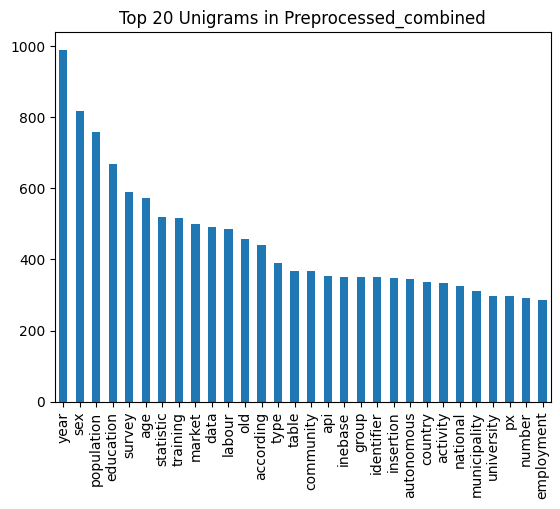

In [ ]:
Uni_gram_features.sum().sort_values(ascending=False).head(30).plot(kind='bar', title='Top 20 Unigrams in Preprocessed_combined')

In [ ]:
unigram_Accuracy=[]

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
    # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
    # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 88.5446%
              precision    recall  f1-score   support

           0       0.47      0.96      0.63        51
           1       0.93      0.98      0.96      2244
           2       0.92      1.00      0.96      1050
           3       0.73      0.99      0.84       176
           4       0.92      0.97      0.94      1664
           5       0.78      0.97      0.87       713
           6       0.84      0.99      0.91       591
           7       0.76      1.00      0.87       106
           8       0.72      1.00      0.84       142
           9       0.91      1.00      0.95       681
          10       0.94      0.99      0.96      2237
          11       0.87      0.98      0.92      1215
          12       0.34      0.97      0.50        32

   micro avg       0.89      0.98      0.93     10902
   macro avg       0.78      0.98      0.86     10902
weighted avg       0.90      0.98      0.94     10902
 samples avg       0.90      0.92      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 93.5563%
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        84
           1       0.96      0.98      0.97      2313
           2       0.95      0.99      0.97      1092
           3       0.90      0.98      0.94       218
           4       0.96      0.97      0.97      1732
           5       0.89      0.96      0.92       821
           6       0.91      0.98      0.95       647
           7       0.86      0.99      0.92       121
           8       0.86      0.99      0.92       172
           9       0.94      0.99      0.97       702
          10       0.97      0.99      0.98      2308
          11       0.93      0.97      0.95      1314
          12       0.68      0.95      0.79        65

   micro avg       0.94      0.98      0.96     11589
   macro avg       0.89      0.98      0.93     11589
weighted avg       0.94      0.98      0.96     11589
 samples avg       0.95      0.96      0.95     11589





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
   # 'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 88.5446%
              precision    recall  f1-score   support

           0       0.47      0.96      0.63        51
           1       0.93      0.98      0.96      2244
           2       0.92      1.00      0.96      1050
           3       0.73      0.99      0.84       176
           4       0.92      0.97      0.94      1664
           5       0.78      0.97      0.87       713
           6       0.84      0.99      0.91       591
           7       0.76      1.00      0.87       106
           8       0.72      1.00      0.84       142
           9       0.91      1.00      0.95       681
          10       0.94      0.99      0.96      2237
          11       0.87      0.98      0.92      1215
          12       0.34      0.97      0.50        32

   micro avg       0.89      0.98      0.93     10902
   macro avg       0.78      0.98      0.86     10902
weighted avg       0.90      0.98      0.94     10902
 samples avg       0.90      0.92      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 93.5563%
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        84
           1       0.96      0.98      0.97      2313
           2       0.95      0.99      0.97      1092
           3       0.90      0.98      0.94       218
           4       0.96      0.97      0.97      1732
           5       0.89      0.96      0.92       821
           6       0.91      0.98      0.95       647
           7       0.86      0.99      0.92       121
           8       0.86      0.99      0.92       172
           9       0.94      0.99      0.97       702
          10       0.97      0.99      0.98      2308
          11       0.93      0.97      0.95      1314
          12       0.68      0.95      0.79        65

   micro avg       0.94      0.98      0.96     11589
   macro avg       0.89      0.98      0.93     11589
weighted avg       0.94      0.98      0.96     11589
 samples avg       0.95      0.96      0.95     11589





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 78.1743%
              precision    recall  f1-score   support

           0       0.02      0.29      0.04         7
           1       0.89      0.96      0.93      2190
           2       0.84      1.00      0.91       953
           3       0.70      0.98      0.81       168
           4       0.90      0.92      0.91      1701
           5       0.70      0.96      0.81       645
           6       0.60      0.99      0.75       425
           7       0.75      0.97      0.85       107
           8       0.25      0.94      0.39        52
           9       0.78      0.99      0.88       583
          10       0.90      0.96      0.93      2190
          11       0.78      0.95      0.86      1135
          12       0.00      0.00      0.00         3

   micro avg       0.81      0.96      0.88     10159
   macro avg       0.62      0.84      0.70     10159
weighted avg       0.84      0.96      0.89     10159
 samples avg       0.82      0.84      0.83     10159





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 2.2 Machine Learning Models with Uni+Bigrams

In [ ]:
uni_bigram_Accuracy=[]

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

265399

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
   # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
   # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 84.1705%
              precision    recall  f1-score   support

           0       0.29      0.97      0.44        31
           1       0.92      0.96      0.94      2256
           2       0.90      0.99      0.94      1026
           3       0.72      0.98      0.83       174
           4       0.91      0.95      0.93      1681
           5       0.74      0.96      0.84       689
           6       0.82      0.99      0.89       575
           7       0.74      1.00      0.85       103
           8       0.59      1.00      0.75       117
           9       0.88      0.99      0.93       658
          10       0.92      0.93      0.93      2318
          11       0.85      0.97      0.91      1206
          12       0.27      0.96      0.43        26

   micro avg       0.87      0.96      0.91     10860
   macro avg       0.74      0.97      0.82     10860
weighted avg       0.88      0.96      0.92     10860
 samples avg       0.88      0.89      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 89.2046%
              precision    recall  f1-score   support

           0       0.66      0.93      0.78        74
           1       0.96      0.97      0.96      2339
           2       0.95      0.99      0.97      1091
           3       0.86      0.96      0.91       213
           4       0.95      0.96      0.95      1741
           5       0.86      0.95      0.90       806
           6       0.89      0.97      0.93       637
           7       0.81      1.00      0.90       113
           8       0.82      0.99      0.89       163
           9       0.91      0.98      0.94       684
          10       0.94      0.92      0.93      2401
          11       0.93      0.96      0.94      1320
          12       0.68      0.95      0.79        65

   micro avg       0.93      0.96      0.94     11647
   macro avg       0.86      0.96      0.91     11647
weighted avg       0.93      0.96      0.94     11647
 samples avg       0.94      0.93      0.93     11647





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 54.7265%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.76      1.00      0.87      1815
           2       0.74      1.00      0.85       838
           3       0.69      1.00      0.82       164
           4       0.75      0.99      0.85      1325
           5       0.40      1.00      0.57       353
           6       0.09      1.00      0.17        64
           7       0.04      1.00      0.08         6
           8       0.00      0.00      0.00         0
           9       0.31      1.00      0.48       232
          10       0.71      1.00      0.83      1681
          11       0.51      1.00      0.68       703
          12       0.00      0.00      0.00         0

   micro avg       0.59      1.00      0.74      7181
   macro avg       0.39      0.77      0.48      7181
weighted avg       0.68      1.00      0.80      7181
 samples avg       0.60      0.65      0.61      7181





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 84.1705%
              precision    recall  f1-score   support

           0       0.29      0.97      0.44        31
           1       0.92      0.96      0.94      2256
           2       0.90      0.99      0.94      1026
           3       0.72      0.98      0.83       174
           4       0.91      0.95      0.93      1681
           5       0.74      0.96      0.84       689
           6       0.82      0.99      0.89       575
           7       0.74      1.00      0.85       103
           8       0.59      1.00      0.75       117
           9       0.88      0.99      0.93       658
          10       0.92      0.93      0.93      2318
          11       0.85      0.97      0.91      1206
          12       0.27      0.96      0.43        26

   micro avg       0.87      0.96      0.91     10860
   macro avg       0.74      0.97      0.82     10860
weighted avg       0.88      0.96      0.92     10860
 samples avg       0.88      0.89      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 89.2046%
              precision    recall  f1-score   support

           0       0.66      0.93      0.78        74
           1       0.96      0.97      0.96      2339
           2       0.95      0.99      0.97      1091
           3       0.86      0.96      0.91       213
           4       0.95      0.96      0.95      1741
           5       0.86      0.95      0.90       806
           6       0.89      0.97      0.93       637
           7       0.81      1.00      0.90       113
           8       0.82      0.99      0.89       163
           9       0.91      0.98      0.94       684
          10       0.94      0.92      0.93      2401
          11       0.93      0.96      0.94      1320
          12       0.68      0.95      0.79        65

   micro avg       0.93      0.96      0.94     11647
   macro avg       0.86      0.96      0.91     11647
weighted avg       0.93      0.96      0.94     11647
 samples avg       0.94      0.93      0.93     11647





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 54.7265%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.76      1.00      0.87      1815
           2       0.74      1.00      0.85       838
           3       0.69      1.00      0.82       164
           4       0.75      0.99      0.85      1325
           5       0.40      1.00      0.57       353
           6       0.09      1.00      0.17        64
           7       0.04      1.00      0.08         6
           8       0.00      0.00      0.00         0
           9       0.31      1.00      0.48       232
          10       0.71      1.00      0.83      1681
          11       0.51      1.00      0.68       703
          12       0.00      0.00      0.00         0

   micro avg       0.59      1.00      0.74      7181
   macro avg       0.39      0.77      0.48      7181
weighted avg       0.68      1.00      0.80      7181
 samples avg       0.60      0.65      0.61      7181





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 2.3 Machine Learning Models with Uni+Bi+Trigrams

In [ ]:
uni_bi_trigram_Accuracy=[]

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

619227

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
  #  'XGBoost': MultiOutputClassifier(XGBClassifier()),
  #  'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 80.8256%
              precision    recall  f1-score   support

           0       0.22      0.96      0.36        24
           1       0.91      0.94      0.93      2286
           2       0.89      0.98      0.93      1031
           3       0.72      0.99      0.83       171
           4       0.91      0.94      0.92      1700
           5       0.72      0.96      0.83       669
           6       0.80      0.99      0.88       563
           7       0.74      1.00      0.85       103
           8       0.54      1.00      0.70       107
           9       0.87      0.99      0.93       656
          10       0.91      0.89      0.90      2383
          11       0.83      0.96      0.89      1188
          12       0.25      1.00      0.40        23

   micro avg       0.85      0.94      0.90     10904
   macro avg       0.72      0.97      0.80     10904
weighted avg       0.87      0.94      0.90     10904
 samples avg       0.87      0.87      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 83.9468%
              precision    recall  f1-score   support

           0       0.64      0.92      0.76        73
           1       0.96      0.94      0.95      2399
           2       0.95      0.95      0.95      1134
           3       0.86      0.87      0.87       234
           4       0.95      0.95      0.95      1760
           5       0.87      0.93      0.90       827
           6       0.89      0.96      0.92       644
           7       0.81      1.00      0.89       112
           8       0.80      0.98      0.88       161
           9       0.91      0.98      0.94       689
          10       0.94      0.83      0.88      2667
          11       0.92      0.95      0.94      1326
          12       0.68      0.85      0.76        73

   micro avg       0.92      0.92      0.92     12099
   macro avg       0.86      0.93      0.89     12099
weighted avg       0.93      0.92      0.92     12099
 samples avg       0.94      0.91      0.91     12099





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 49.6924%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.72      1.00      0.84      1706
           2       0.73      1.00      0.84       826
           3       0.66      1.00      0.80       157
           4       0.68      0.99      0.81      1204
           5       0.34      1.00      0.51       303
           6       0.06      1.00      0.11        40
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.30      1.00      0.46       224
          10       0.65      1.00      0.79      1539
          11       0.44      1.00      0.61       600
          12       0.00      0.00      0.00         0

   micro avg       0.55      1.00      0.71      6599
   macro avg       0.35      0.69      0.44      6599
weighted avg       0.64      1.00      0.77      6599
 samples avg       0.54      0.59      0.56      6599





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
#   'XGBoost': OneVsRestClassifier(XGBClassifier()),
#  'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 80.8256%
              precision    recall  f1-score   support

           0       0.22      0.96      0.36        24
           1       0.91      0.94      0.93      2286
           2       0.89      0.98      0.93      1031
           3       0.72      0.99      0.83       171
           4       0.91      0.94      0.92      1700
           5       0.72      0.96      0.83       669
           6       0.80      0.99      0.88       563
           7       0.74      1.00      0.85       103
           8       0.54      1.00      0.70       107
           9       0.87      0.99      0.93       656
          10       0.91      0.89      0.90      2383
          11       0.83      0.96      0.89      1188
          12       0.25      1.00      0.40        23

   micro avg       0.85      0.94      0.90     10904
   macro avg       0.72      0.97      0.80     10904
weighted avg       0.87      0.94      0.90     10904
 samples avg       0.87      0.87      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 83.9468%
              precision    recall  f1-score   support

           0       0.64      0.92      0.76        73
           1       0.96      0.94      0.95      2399
           2       0.95      0.95      0.95      1134
           3       0.86      0.87      0.87       234
           4       0.95      0.95      0.95      1760
           5       0.87      0.93      0.90       827
           6       0.89      0.96      0.92       644
           7       0.81      1.00      0.89       112
           8       0.80      0.98      0.88       161
           9       0.91      0.98      0.94       689
          10       0.94      0.83      0.88      2667
          11       0.92      0.95      0.94      1326
          12       0.68      0.85      0.76        73

   micro avg       0.92      0.92      0.92     12099
   macro avg       0.86      0.93      0.89     12099
weighted avg       0.93      0.92      0.92     12099
 samples avg       0.94      0.91      0.91     12099





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 49.6924%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.72      1.00      0.84      1706
           2       0.73      1.00      0.84       826
           3       0.66      1.00      0.80       157
           4       0.68      0.99      0.81      1204
           5       0.34      1.00      0.51       303
           6       0.06      1.00      0.11        40
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.30      1.00      0.46       224
          10       0.65      1.00      0.79      1539
          11       0.44      1.00      0.61       600
          12       0.00      0.00      0.00         0

   micro avg       0.55      1.00      0.71      6599
   macro avg       0.35      0.69      0.44      6599
weighted avg       0.64      1.00      0.77      6599
 samples avg       0.54      0.59      0.56      6599





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
